# **Final Project** - `Yassine ERRAJI` & `William PELTIER`

## ***Business Problem Definition*** 

William and I came to notice that companies struggle to offer competitive salaries for data science-related positions.

So we decided to build a project that analyzes salary determinants, predicts expected compensation, segments job roles, and visualizes job families to improve HR compensation strategy and hiring decisions.

Chapters seen in class were the pillars of this project and we will effort ourselves to cover as many concepts studied as possible but only while it is **not** at the expense of high quality insights and a concrete business problem being solved.

## ***The Dataset*** 

* The Data in the dataset is extracted from the Glassdoor website, which is a job posting website. 

* The dataset has data related to data science jobs and salaries and a lot more, offering a clear view of job opportunities. 

* It is packed with essential details like job titles, estimated salaries, job descriptions, company ratings, and key company info such as location, size, and industry. 

### A few columns in the dataset include information on

**Job Title:** Title of the Job

**Salary Estimate:** Estimated salary for the job that the company provides

**Job Description:** The description of the job

**Rating:** Rating of the company

**Company Name:** Name of the Company

**Location:** Location of the job

**Headquarters:** Headquarters of the company

**Size:** Number of employees in the company

**Founded:** The year company founded

**Type of ownership:** Ownership types like private, public, government, and non-profit organizations

**Industry:** Industry type like Aerospace, Energy where the company provides services

**Sector:** Which type of services company provide in the industry, like industry (Energy), Sector (Oil, Gas)

**Revenue:** Total revenue of the company

**Competitors:** Company competitors

... and more !

## ***Tasks Performed*** 

* **Regression** : Predict average salary.

* **Classification** : Predict whether a job is "high-paying".

* **Clustering** : Segment job postings into meaningful job families.

* **Dimensionality Reduction** : PCA & t-SNE to visualize job similarities

## 1. Data Importation & Base Cleaning

In [47]:
# Core stack for data handling and quick visuals
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re  # regex helpers for interval extraction
import textwrap  # tidy axis labels

# Display settings to keep outputs readable in the notebook
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

print("Pandas version:", pd.__version__)

Pandas version: 2.3.3


In [48]:
# Load the dataset (keep the CSV next to this notebook)
data_path = "Glassdoor_Salary.csv"

df_raw = pd.read_csv(data_path)

print(f"Rows: {df_raw.shape[0]:,} | Columns: {df_raw.shape[1]}")
df_raw.head(3)

Rows: 742 | Columns: 28


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1


In [49]:
# Inspect structure with numeric stats
print("\n[Numeric summary]")
df_raw.describe(include=np.number).T.round(2)


[Numeric summary]


,count,mean,std,min,25%,50%,75%,max
Rating,742.0,3.62,0.80,-1.0,3.3,3.7,4.0,5.0
Founded,742.0,1837.15,497.18,-1.0,1939.0,1988.0,2007.0,2019.0
hourly,742.0,0.03,0.18,0.0,0.0,0.0,0.0,1.0
employer_provided,742.0,0.02,0.15,0.0,0.0,0.0,0.0,1.0
min_salary,742.0,74.07,31.87,10.0,52.0,69.5,91.0,202.0
max_salary,742.0,127.18,46.91,16.0,96.0,124.0,155.0,306.0
avg_salary,742.0,100.63,38.86,13.5,73.5,97.5,122.5,254.0
same_state,742.0,0.56,0.50,0.0,0.0,1.0,1.0,1.0
age,742.0,46.59,53.78,-1.0,11.0,24.0,59.0,276.0
python_yn,742.0,0.53,0.50,0.0,0.0,1.0,1.0,1.0


In [50]:
# Missingness per column (absolute + percentage)
missing = (
    df_raw.isna()
    .sum()
    .to_frame(name="missing_count")
    .assign(missing_pct=lambda d: (d["missing_count"] / len(df_raw) * 100).round(2))
    .sort_values("missing_pct", ascending=False)
)

missing.head(20)

,missing_count,missing_pct
Job Title,0,0.0
Salary Estimate,0,0.0
aws,0,0.0
spark,0,0.0
R_yn,0,0.0
python_yn,0,0.0
age,0,0.0
same_state,0,0.0
job_state,0,0.0
company_txt,0,0.0


The dataset has no missing values. 

**Cleaning principles we apply now**
- Keep the raw data intact (`df_raw`) and build a cleaned copy (`df_clean`).
- Drop exact duplicates (defensive: some scrapes repeat postings).
- Enforce numeric dtypes for salary and rating; coerce invalid entries to `NaN` so we can handle them consistently.
- Cast clearly categorical fields to `category` to reduce memory and make later encoding explicit.
- Fill simple missing values with lightweight defaults:
  - Numeric → median (robust to outliers).
  - Categorical → "Unknown" (keeps rows instead of dropping data).
- Remove columns that add no information (all missing or single-value columns, and stray `Unnamed` index columns).


In [51]:
# Build a cleaned copy we can safely mutate
print("Starting shape (raw):", df_raw.shape)
df_clean = df_raw.copy()

# 1) Drop stray index-like columns (often named 'Unnamed: 0', etc.)
index_like = [c for c in df_clean.columns if c.lower().startswith("unnamed") or c.lower() == "index"]
if index_like:
    print("Dropping index-like columns:", index_like)
    df_clean = df_clean.drop(columns=index_like)

# 2) Remove exact duplicate rows (conservative, keeps first occurrence)
before = len(df_clean)
df_clean = df_clean.drop_duplicates().reset_index(drop=True)
print(f"Removed {before - len(df_clean)} duplicate rows")

# 3) Normalize interval-like text columns
#    - Salary Estimate: keep numeric interval only ("$53K-$91K" -> "53-91")
#    - Size: keep numeric interval only ("501 to 1000 employees" -> "501-1000")
#    - Revenue: express in millions and keep interval ("$2 to $5 billion" -> "2000-5000")

def _extract_interval(text):
    """Extract first two integers as an interval string 'lo-hi'."""
    if pd.isna(text):
        return np.nan
    nums = re.findall(r"\d+", str(text))
    if len(nums) >= 2:
        return f"{nums[0]}-{nums[1]}"
    if len(nums) == 1:
        return f"{nums[0]}-{nums[0]}"
    return np.nan

def _extract_revenue_millions(text):
    """Convert revenue text to millions interval (e.g., '$2 to $5 billion' -> '2000-5000')."""
    if pd.isna(text):
        return np.nan
    t = str(text).lower()
    if "unknown" in t or "non-applicable" in t:
        return np.nan
    nums = re.findall(r"[\d\.]+", t)
    if not nums:
        return np.nan
    factor = 1000 if "billion" in t else 1  # billions -> millions
    if len(nums) >= 2:
        lo = float(nums[0]) * factor
        hi = float(nums[1]) * factor
    else:
        lo = hi = float(nums[0]) * factor
    lo_int, hi_int = int(round(lo)), int(round(hi))
    return f"{lo_int}-{hi_int}"

if "Salary Estimate" in df_clean.columns:
    df_clean["Salary Estimate"] = df_clean["Salary Estimate"].apply(_extract_interval)

if "Size" in df_clean.columns:
    df_clean["Size"] = df_clean["Size"].apply(_extract_interval)

if "Revenue" in df_clean.columns:
    df_clean["Revenue"] = df_clean["Revenue"].apply(_extract_revenue_millions)

# Rename columns for clarity
rename_map = {
    "Size": "Size (Employees)",
    "Revenue": "Revenue ($M)",
}
df_clean = df_clean.rename(columns=rename_map)

# 4) Enforce dtypes for key numeric columns
numeric_cols = [
    "min_salary", "max_salary", "avg_salary",     # core salary targets
    "rating", "age",                              # company-level numeric
    "Founded"                                     # may be year, keep numeric for potential age calc
]
existing_numeric = [c for c in numeric_cols if c in df_clean.columns]
df_clean[existing_numeric] = df_clean[existing_numeric].apply(pd.to_numeric, errors="coerce")

# 5) Standardize binary flags as integers (keeps missing as <NA> before filling)
binary_cols = [
    "hourly", "employer_provided", "same_state",
    "python_yn", "R_yn", "spark", "aws", "excel"
]
existing_binary = [c for c in binary_cols if c in df_clean.columns]
for col in existing_binary:
    df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce").astype("Int64")

# 6) Categorical fields we will later encode
categorical_cols = [
    "Job Title", "Salary Estimate", "Job Description", "Company Name", "company_txt",
    "Location", "Headquarters", "Size (Employees)", "Type of ownership", "Industry", "Sector",
    "Revenue ($M)", "job_state", "Competitors"
]
existing_cats = [c for c in categorical_cols if c in df_clean.columns]
for col in existing_cats:
    df_clean[col] = df_clean[col].astype("category")

# 7) Simple missing-value handling (only if needed)
#    - Numeric/binary: median
#    - Categorical: 'Unknown' (added only if not already present)
for col in existing_numeric + existing_binary:
    if df_clean[col].isna().any():
        median = df_clean[col].median()
        df_clean[col] = df_clean[col].fillna(median)

for col in existing_cats:
    if df_clean[col].isna().any():
        if "Unknown" not in df_clean[col].cat.categories:
            df_clean[col] = df_clean[col].cat.add_categories(["Unknown"])
        df_clean[col] = df_clean[col].fillna("Unknown")

# 8) Drop columns that carry no information (all missing or single unique value)
low_info_cols = [c for c in df_clean.columns if df_clean[c].nunique(dropna=True) <= 1]
if low_info_cols:
    print("Dropping low-information columns:", low_info_cols)
    df_clean = df_clean.drop(columns=low_info_cols)

print("Clean shape:", df_clean.shape)
df_clean.head(3)

Starting shape (raw): (742, 28)
Removed 275 duplicate rows
Clean shape: (467, 28)


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size (Employees),Founded,Type of ownership,Industry,Sector,Revenue ($M),Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501-1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,50-100,-1,0,0,53,91,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000-10000,1984,Other Organization,Health Care Services & Hospitals,Health Care,2000-5000,-1,0,0,63,112,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501-1000,2010,Company - Private,Security Services,Business Services,100-500,-1,0,0,80,90,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1


We are now ready to move on to EDA.

## 2. Exploratory Data Analysis 

Task 2.1 – Salary Distribution
	•	Histogram of avg_salary
	•	Boxplot by state, industry, size

Task 2.2 – Salary differences across categories
	•	Salary by:
	•	job_state
	•	industry
	•	sector
	•	company_size

Boxplots + groupby summaries.

Task 2.3 – Skill prevalence
	•	Count plots for python_yn, R_yn, spark, aws, excel
	•	Heatmap of skills vs salary

Task 2.4 – Correlation matrix for numerical features

Include:
	•	rating, age, salaries, skill binaries (as ints), same_state

Task 2.5 – Outliers and anomalies detection

Identify:

	•	Very high salaries
	•	Inconsistent ratings
	•	Very young or very old companies

We do not need to remove them unless they break models.

### 2.A EDA game plan (compact)

We stay concise but aim for visual signal:
- Salary distribution (hist + box) to see central tendency and tails.
- Salary by geography/industry (top categories only, to keep it readable).
- Skill prevalence (how often python/R/spark/aws/excel appear).
- Correlation heatmap on key numeric/binary fields.

We derive midpoints for the interval-like columns (`Size (Employees)`, `Revenue ($M)`) so we can plot them numerically without extra clutter.

In [52]:
# Set a clean aesthetic for all plots
sns.set_theme(style="whitegrid", context="talk", palette="Set2")

# Helper: midpoint for interval strings like "501-1000" or "2000-5000"
def interval_midpoint(interval_str):
    if pd.isna(interval_str):
        return np.nan
    nums = re.findall(r"\d+", str(interval_str))
    if len(nums) >= 2:
        lo, hi = float(nums[0]), float(nums[1])
        return (lo + hi) / 2
    if len(nums) == 1:
        val = float(nums[0])
        return val
    return np.nan

# Copy for plotting and add numeric midpoints when available
df_eda = df_clean.copy()
if "Size (Employees)" in df_eda.columns:
    df_eda["size_mid"] = df_eda["Size (Employees)"].apply(interval_midpoint)
if "Revenue ($M)" in df_eda.columns:
    df_eda["revenue_mid_m"] = df_eda["Revenue ($M)"].apply(interval_midpoint)

df_eda[["avg_salary", "size_mid", "revenue_mid_m"]].describe().round(2)

,avg_salary,size_mid,revenue_mid_m
count,467.00,462.00,334.00
mean,100.98,3288.67,28374.73
std,37.32,3750.32,74991.16
min,13.50,1.00,1.00
25%,76.00,350.50,75.00
50%,97.50,750.50,1500.00
75%,121.00,7500.50,10000.00
max,254.00,10000.00,250500.00


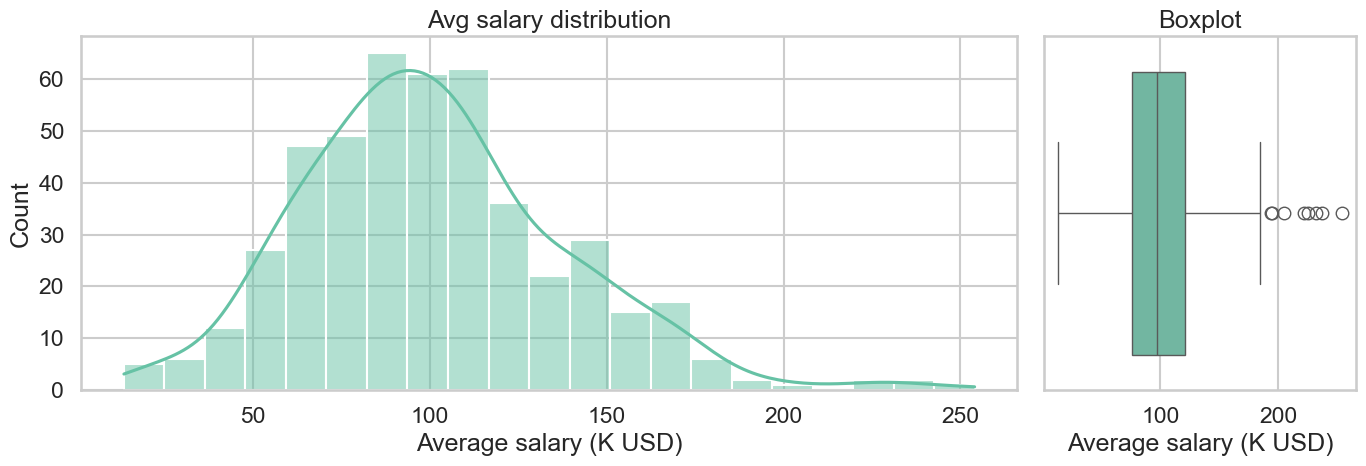

In [53]:
# Salary distribution: histogram + compact boxplot
fig, axes = plt.subplots(1, 2, figsize=(14, 5), gridspec_kw={"width_ratios": [3, 1]})

sns.histplot(df_eda, x="avg_salary", kde=True, ax=axes[0])
axes[0].set_title("Avg salary distribution")
axes[0].set_xlabel("Average salary (K USD)")

sns.boxplot(df_eda, x="avg_salary", ax=axes[1], orient="h")
axes[1].set_title("Boxplot")
axes[1].set_xlabel("Average salary (K USD)")

plt.tight_layout()
plt.show()

/var/folders/4c/27024g9s33d5p6whgp0356km0000gn/T/ipykernel_50455/3790694754.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_yticklabels(short_labels)


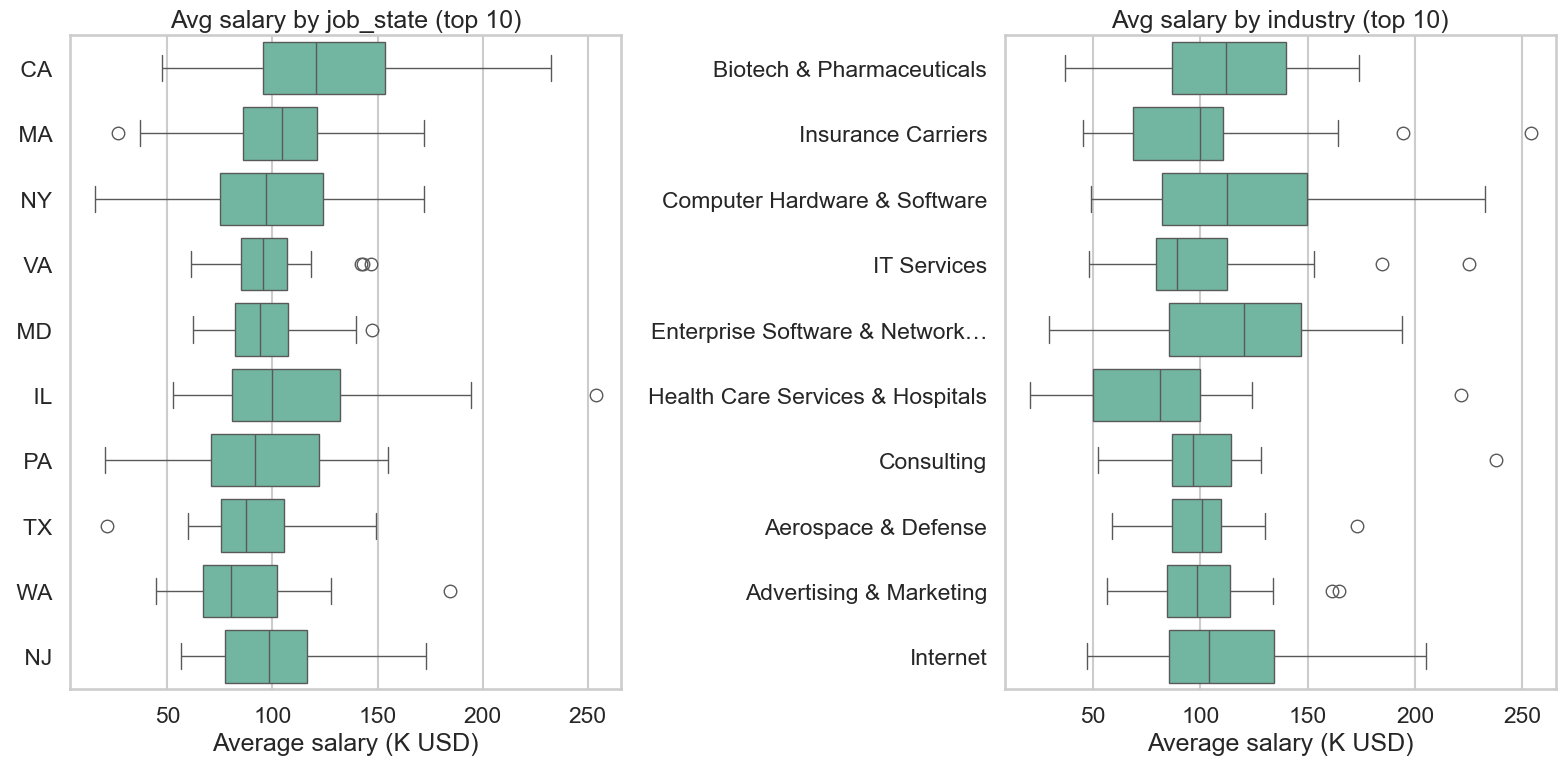

In [54]:
# Salary by geography and industry (top categories only to stay legible)
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Top 10 states (labels are short already)
if "job_state" in df_eda.columns:
    top_states = df_eda["job_state"].value_counts().head(10).index
    sns.boxplot(
        data=df_eda[df_eda["job_state"].isin(top_states)],
        y="job_state", x="avg_salary", ax=axes[0], orient="h",
        order=top_states
    )
    axes[0].set_title("Avg salary by job_state (top 10)")
    axes[0].set_xlabel("Average salary (K USD)")
    axes[0].set_ylabel("")

# Top 10 industries (shortened labels to avoid overlap)
if "Industry" in df_eda.columns:
    top_ind = df_eda["Industry"].value_counts().head(10).index.tolist()
    short_labels = [textwrap.shorten(str(lbl), width=32, placeholder="…") for lbl in top_ind]
    sns.boxplot(
        data=df_eda[df_eda["Industry"].isin(top_ind)],
        y="Industry", x="avg_salary", ax=axes[1], orient="h",
        order=top_ind
    )
    axes[1].set_title("Avg salary by industry (top 10)")
    axes[1].set_xlabel("Average salary (K USD)")
    axes[1].set_ylabel("")
    axes[1].set_yticklabels(short_labels)

plt.tight_layout()
plt.show()

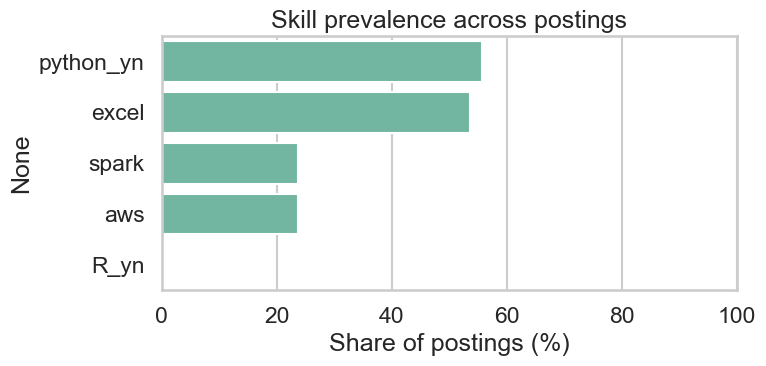

In [55]:
# Skill prevalence (share of postings that require each skill)
skill_cols = [c for c in ["python_yn", "R_yn", "spark", "aws", "excel"] if c in df_eda.columns]
if skill_cols:
    skill_share = df_eda[skill_cols].mean().sort_values(ascending=False) * 100
    plt.figure(figsize=(8, 4))
    sns.barplot(x=skill_share.values, y=skill_share.index)
    plt.xlabel("Share of postings (%)")
    plt.title("Skill prevalence across postings")
    plt.xlim(0, 100)
    plt.tight_layout()
    plt.show()

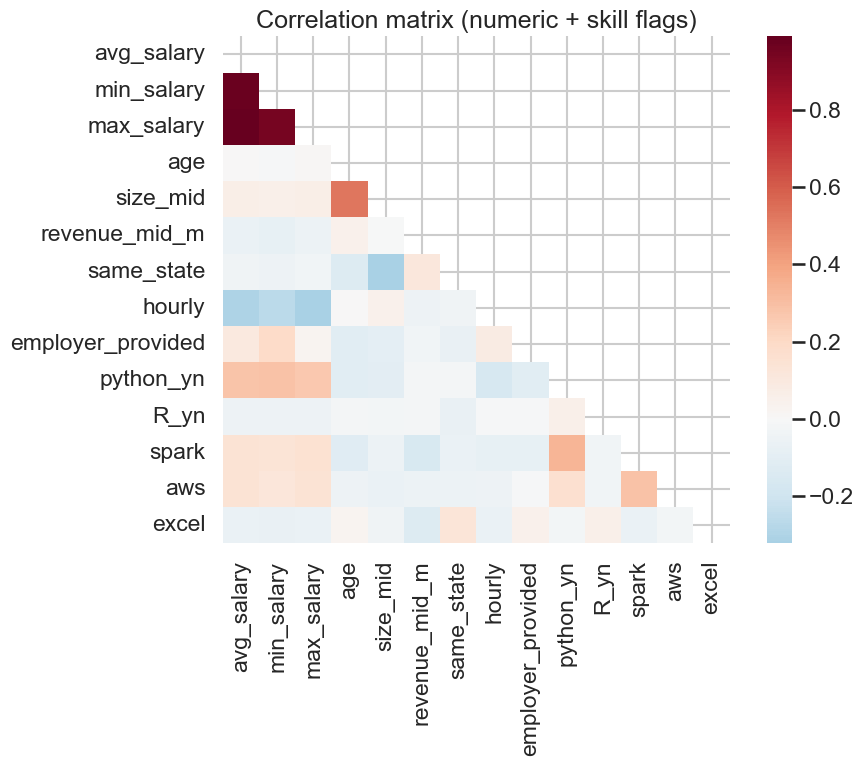

In [56]:
# Correlation heatmap for key numeric/binary features
corr_cols = [
    "avg_salary", "min_salary", "max_salary", "rating", "age",
    "size_mid", "revenue_mid_m", "same_state", "hourly", "employer_provided",
    "python_yn", "R_yn", "spark", "aws", "excel"
]
corr_cols = [c for c in corr_cols if c in df_eda.columns]

if corr_cols:
    corr = df_eda[corr_cols].astype(float).corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, mask=mask, cmap="RdBu_r", center=0, annot=False, fmt=".2f", square=True)
    plt.title("Correlation matrix (numeric + skill flags)")
    plt.tight_layout()
    plt.show()

## 3. Feature Engineering

Task 3.1 – Encode categorical features

Use:

	•	One-hot encoding for: sector, industry, revenue, company size, job_state, type_of_ownership
	•	Ordinal encoding for revenue if logically ordered (e.g., “Less than $1M”, “$1-5M”, …)

Task 3.2 – Create additional features

You can and should engineer:

	•	salary_range = max_salary - min_salary
	•	is_senior = 1 if ("Senior" or "Sr" in job_title)
	•	is_manager = 1 if ("Manager" in job_title)
	•	num_skills = python_yn + R_yn + spark + aws + excel
	•	Extract simplified job categories from job titles (data engineer, analyst, DS, ML, cloud, etc.)

Task 3.3 – Train/validation split

	•	train_test_split(df, test_size=0.2, random_state=42)

This is the dataset we will use for regression & classification.

### 3.A Feature engineering approach (minimal + clear)

We keep it lean but useful:
- Numerical helpers: salary range; midpoints for size and revenue intervals.
- Role signals from title: senior/manager flags and a coarse job category.
- Skill intensity: count of listed tech skills.
- Classification target: `high_salary` as the top quartile of `avg_salary`.
- Modeling split: create a ready-to-encode dataframe for regression/classification.

We continue to talk in "we" to keep the narrative consistent.


**What we have now**
- `df_fe`: cleaned + engineered features (salary range, midpoints, title flags, role bucket, skill counts, high_salary target).
- `X`: numeric plus one-hot encoded categoricals, ready for modeling.
- `y_reg` / `y_clf`: regression and classification targets.
- `X_train`, `X_valid`, `y_train_*`, `y_valid_*`: simple 80/20 splits to plug into upcoming models.

We’ll keep feature steps minimal and transparent so later model cells can stay concise.

## 4. Regression - Predicting Salary

Task 4.1 – Baseline model

	•	Linear Regression
	•	Evaluate: RMSE, MAE, R²

Task 4.2 – Regularized models

Use:

	•	Ridge
	•	Lasso
	•	Compare parameter tuning via GridSearchCV

Task 4.3 – Tree-based regressors

	•	Random Forest Regressor
	•	Gradient Boosting Regressor

Task 4.4 – Model comparison table

Include:

	•	RMSE on train & test
	•	R² test
	•	Which model generalizes best?

Task 4.5 – Interpret results

For the best model:

	•	Feature importances
	•	Which skills increase salary?
	•	Which industries pay more?
	•	How much does a 1-point rating increase salary?
	•	Effect of seniority

This is where the business insights shine.

**Next:** if we need more robustness, we can add Gradient Boosting / XGBoost and simple hyperparam sweeps, but for now these baselines give us a clear view of linear vs. non-linear performance.

## 5. Classification - Predicting High-Paying Jobs

Task 5.1 – Create a classification target

Define :
```python 
threshold = df["avg_salary"].quantile(0.75)
df["high_salary"] = (df["avg_salary"] >= threshold).astype(int)
````
Task 5.2 – Train classification models

Models to include:

	•	Logistic Regression
	•	KNN
	•	Decision Tree
	•	Random Forest / Gradient Boosting

Task 5.3 – Evaluate performance

	•	Confusion matrix
	•	Precision, recall, F1
	•	ROC-AUC curve

Task 5.4 – Explain model

From logistic regression:

	•	Significant predictors
	•	Odds ratios
From tree models:
	•	Feature importances

Business interpretation:

	•	Which skills most strongly predict high-paying jobs?
	•	Which industries/states tend to offer higher salaries?
	•	What role does company size or age play?

## 6. Dimensionality Reduction (PCA + t-SNE)

Task 6.1 – Select relevant features

Two possible approaches:

Approach A — Skill space only

	•	python_yn, R_yn, spark, aws, excel

Approach B — Full feature set
(use scaled numeric + encoded categorical)

Task 6.2 – Standardize features

Use StandardScaler.

Task 6.3 – PCA

	•	Show explained variance ratio
	•	Plot PC1 vs PC2
	•	Interpret loadings (e.g., PC1 = cloud skills vs analyst skills)

Task 6.4 – t-SNE or UMAP

	•	Use perplexity tuning
	•	Visualize role clusters in 2D

Insight:

Reveal natural divisions such as:

	•	Data engineering vs. analyst vs. ML roles
	•	Cloud-heavy vs. coding-heavy vs. business roles

## 7. Clustering Analysis

Task 7.1 – Apply clustering on PCA-reduced data

Methods:

	•	K-means
	•	Hierarchical clustering
	•	(optional) DBSCAN

Task 7.2 – Determine optimal cluster number

Use:

	•	Elbow method
	•	Silhouette score

Task 7.3 – Visualize clusters (very important)

Show:

	•	Clusters on PCA components
	•	Clusters on t-SNE map

Task 7.4 – Characterize clusters

For each cluster:

	•	Mean salary
	•	Most common skills
	•	Dominant industries or job titles
	•	Typical company size

Business insights:

	•	Identify distinct job families
	•	Understand which clusters correspond to high-paying profiles
	•	Recommend tailored compensation bands


## 8. Business Interpretation & Recommendation Section 

Task 8.1 – Synthesize key insights from all models

Examples:

	•	Python + AWS adds X salary premium
	•	Data engineers cluster separately and earn more than analysts
	•	Industry A systematically underpays compared to industry B
	•	Rating and company age have moderate influence

Task 8.2 – Provide actionable recommendations

For example:

	•	For companies:
	•	“Increase salary offers in states X and Y to remain competitive”
	•	“Roles requiring cloud skills should have independent pay scales”
	•	For job seekers:
	•	“Adding Spark or AWS significantly increases expected salary”

Task 8.3 – Highlight limitations and future improvements

	•	Dataset size
	•	Potential sampling bias
	•	Missing compensation factors (benefits, bonuses)
	•	Text processing could be extended